# Initial value problem for colliding gravitational plane waves I by Hauser & Ernst
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

https://aip.scitation.org/doi/abs/10.1063/1.528355

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols('u v x y du dv dx dy')

In [4]:
rho = Function('rho')(u,v)
rho

In [5]:
psi = Function('psi')(u,v)
psi

In [6]:
gamma = Function('gamma')(u,v)
gamma

In [9]:
variables = Matrix([u,v,x,y])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [10]:
differentials = Matrix([du,dv,dx,dy])
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

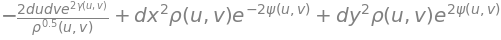

In [11]:
lineElement = expand( rho * ( exp(-2*psi) * dx**2 + exp(2*psi) * dy**2 ) - (2/rho**(1/2)) * ( exp(2*gamma)*du*dv) )
lineElement 

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡                           -0.5        2⋅γ(u, v)                                         ⎤
⎢           0             -ρ    (u, v)⋅ℯ                    0                   0         ⎥
⎢                                                                                         ⎥
⎢  -0.5        2⋅γ(u, v)                                                                  ⎥
⎢-ρ    (u, v)⋅ℯ                      0                      0                   0         ⎥
⎢                                                                                         ⎥
⎢                                                           -2⋅ψ(u, v)                    ⎥
⎢           0                        0             ρ(u, v)⋅ℯ                    0         ⎥
⎢                                                                                         ⎥
⎢                                                                                2⋅ψ(u, v)⎥
⎣           0                        0                      0           ρ(u, v)⋅

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡                           -0.5        2⋅γ(u, v)                                         ⎤
⎢           0             -ρ    (u, v)⋅ℯ                    0                   0         ⎥
⎢                                                                                         ⎥
⎢  -0.5        2⋅γ(u, v)                                                                  ⎥
⎢-ρ    (u, v)⋅ℯ                      0                      0                   0         ⎥
⎢                                                                                         ⎥
⎢                                                           -2⋅ψ(u, v)                    ⎥
⎢           0                        0             ρ(u, v)⋅ℯ                    0         ⎥
⎢                                                                                         ⎥
⎢                                                                                2⋅ψ(u, v)⎥
⎣           0                        0                      0           ρ(u, v)⋅

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [17]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                          
⎢⎡       -1.0       ∂                 ∂                                                                                    
⎢⎢- 0.5⋅ρ    (u, v)⋅──(ρ(u, v)) + 2.0⋅──(γ(u, v))  0                                     0                                 
⎢⎢                  ∂u                ∂u                                                                                   
⎢⎢                                                                                                                         
⎢⎢                       0                         0                                     0                                 
⎢⎢                                                                                                                         
⎢⎢                                                    ⎛                        ∂          ⎞                                
⎢⎢      

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                                                   2      
⎢                                                                                                     -1.0         ∂       
⎢⎛                              2                                   2         ⎞                      ρ    (u, v)⋅─────(ρ(u,
⎢⎜       1.0       ⎛∂          ⎞        ∂           ∂              ∂          ⎟  -1.0                            ∂v ∂u     
⎢⎜- 2.0⋅ρ   (u, v)⋅⎜──(ψ(u, v))⎟  + 2.0⋅──(γ(u, v))⋅──(ρ(u, v)) - ───(ρ(u, v))⎟⋅ρ    (u, v)        - ──────────────────────
⎢⎜                 ⎝∂u         ⎠        ∂u          ∂u              2         ⎟                                  2         
⎢⎝                                                                ∂u          ⎠                                            
⎢                                                                                                                          
⎢       

In [ ]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

In [ ]:
#  R = RicciScalar.from_riccitensor(Ric)
#  R.simplify()
#  R.expr

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [ ]:
simplify(Ric.tensor())

In [ ]:
simplify(einst.tensor())